In [1]:
!pip install opencv-python

In [2]:
import os
import cv2
import numpy as np

Encoding and Split data into Train/Test Sets

In [3]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Tensorflow Keras CNN Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop

Plot images

In [5]:
import matplotlib.pyplot as plt

In [6]:
folder_dir=r"C:\Users\uniqu\Desktop\Jupyter programs\Deep _ Learning\Projects\Flower Recognition\archive (1)\flowers"

 Now, read each image in the data and create a label for each with the name of the folder

In [7]:
data=[]
label=[]

SIZE = 128   #crop the image to 128 * 128

In [8]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

Now let’s convert the data into numerical values

In [9]:
#converting into array
data_arr=np.array(data)
label_arr=np.array(label)

In [10]:
#converting into numerical values
encoder=LabelEncoder()
y=encoder.fit_transform(label_arr)
y=to_categorical(y,5 )
X=data_arr/255

Now splitting the dataset into 80% training and 20% test sets

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=10)

Now let's build a neural network model for flower recognition

In [12]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(SIZE, SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='softmax'))

Before compiling the model we need to create more training images to prevent overfitting

In [13]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

Now let’s compile the neural network model

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

C:\Users\uniqu\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
108/108 [==============================] - 1753s 16s/step - loss: 1.5013 - accuracy: 0.3171 - val_loss: 1.3236 - val_accuracy: 0.4271
Epoch 2/64
108/108 [==============================] - 1758s 16s/step - loss: 1.3550 - accuracy: 0.4086 - val_loss: 1.2491 - val_accuracy: 0.4444
Epoch 3/64
108/108 [==============================] - 1597s 15s/step - loss: 1.2739 - accuracy: 0.4512 - val_loss: 1.1700 - val_accuracy: 0.5012
Epoch 4/64
108/108 [==============================] - 1750s 16s/step - loss: 1.2387 - accuracy: 0.4735 - val_loss: 1.2751 - val_accuracy: 0.4734
Epoch 5/64
108/108 [==============================] - 1660s 15s/step - loss: 1.1913 - accuracy: 0.5071 - val_loss: 1.0821 - val_accuracy: 0.5567
Epoch 6/64
108/108 [==============================] - 1757s 16s/step - loss: 1.1475 - accuracy: 0.5288 - val_loss: 1.1386 - val_accuracy: 0.5289
Epoch 7/64
108/108 [==============================] - 1804s 17s/step - loss: 1.1188 - accuracy: 0.5471 - val_loss: 1.0532 - val_ac

108/108 [==============================] - 1981s 18s/step - loss: 0.6442 - accuracy: 0.7582 - val_loss: 0.6641 - val_accuracy: 0.7627
Epoch 58/64
108/108 [==============================] - 1899s 18s/step - loss: 0.6504 - accuracy: 0.7562 - val_loss: 0.6512 - val_accuracy: 0.7650
Epoch 59/64
108/108 [==============================] - 1809s 17s/step - loss: 0.6389 - accuracy: 0.7695 - val_loss: 0.6615 - val_accuracy: 0.7662
Epoch 60/64
108/108 [==============================] - 1773s 16s/step - loss: 0.6475 - accuracy: 0.7544 - val_loss: 0.6749 - val_accuracy: 0.7604
Epoch 61/64
108/108 [==============================] - 1596s 15s/step - loss: 0.6304 - accuracy: 0.7657 - val_loss: 0.7147 - val_accuracy: 0.7442
Epoch 62/64
108/108 [==============================] - 1825s 17s/step - loss: 0.6198 - accuracy: 0.7657 - val_loss: 0.7361 - val_accuracy: 0.7292
Epoch 63/64
108/108 [==============================] - 2539s 24s/step - loss: 0.6193 - accuracy: 0.7692 - val_loss: 0.6450 - val_accurac

Testing the Model

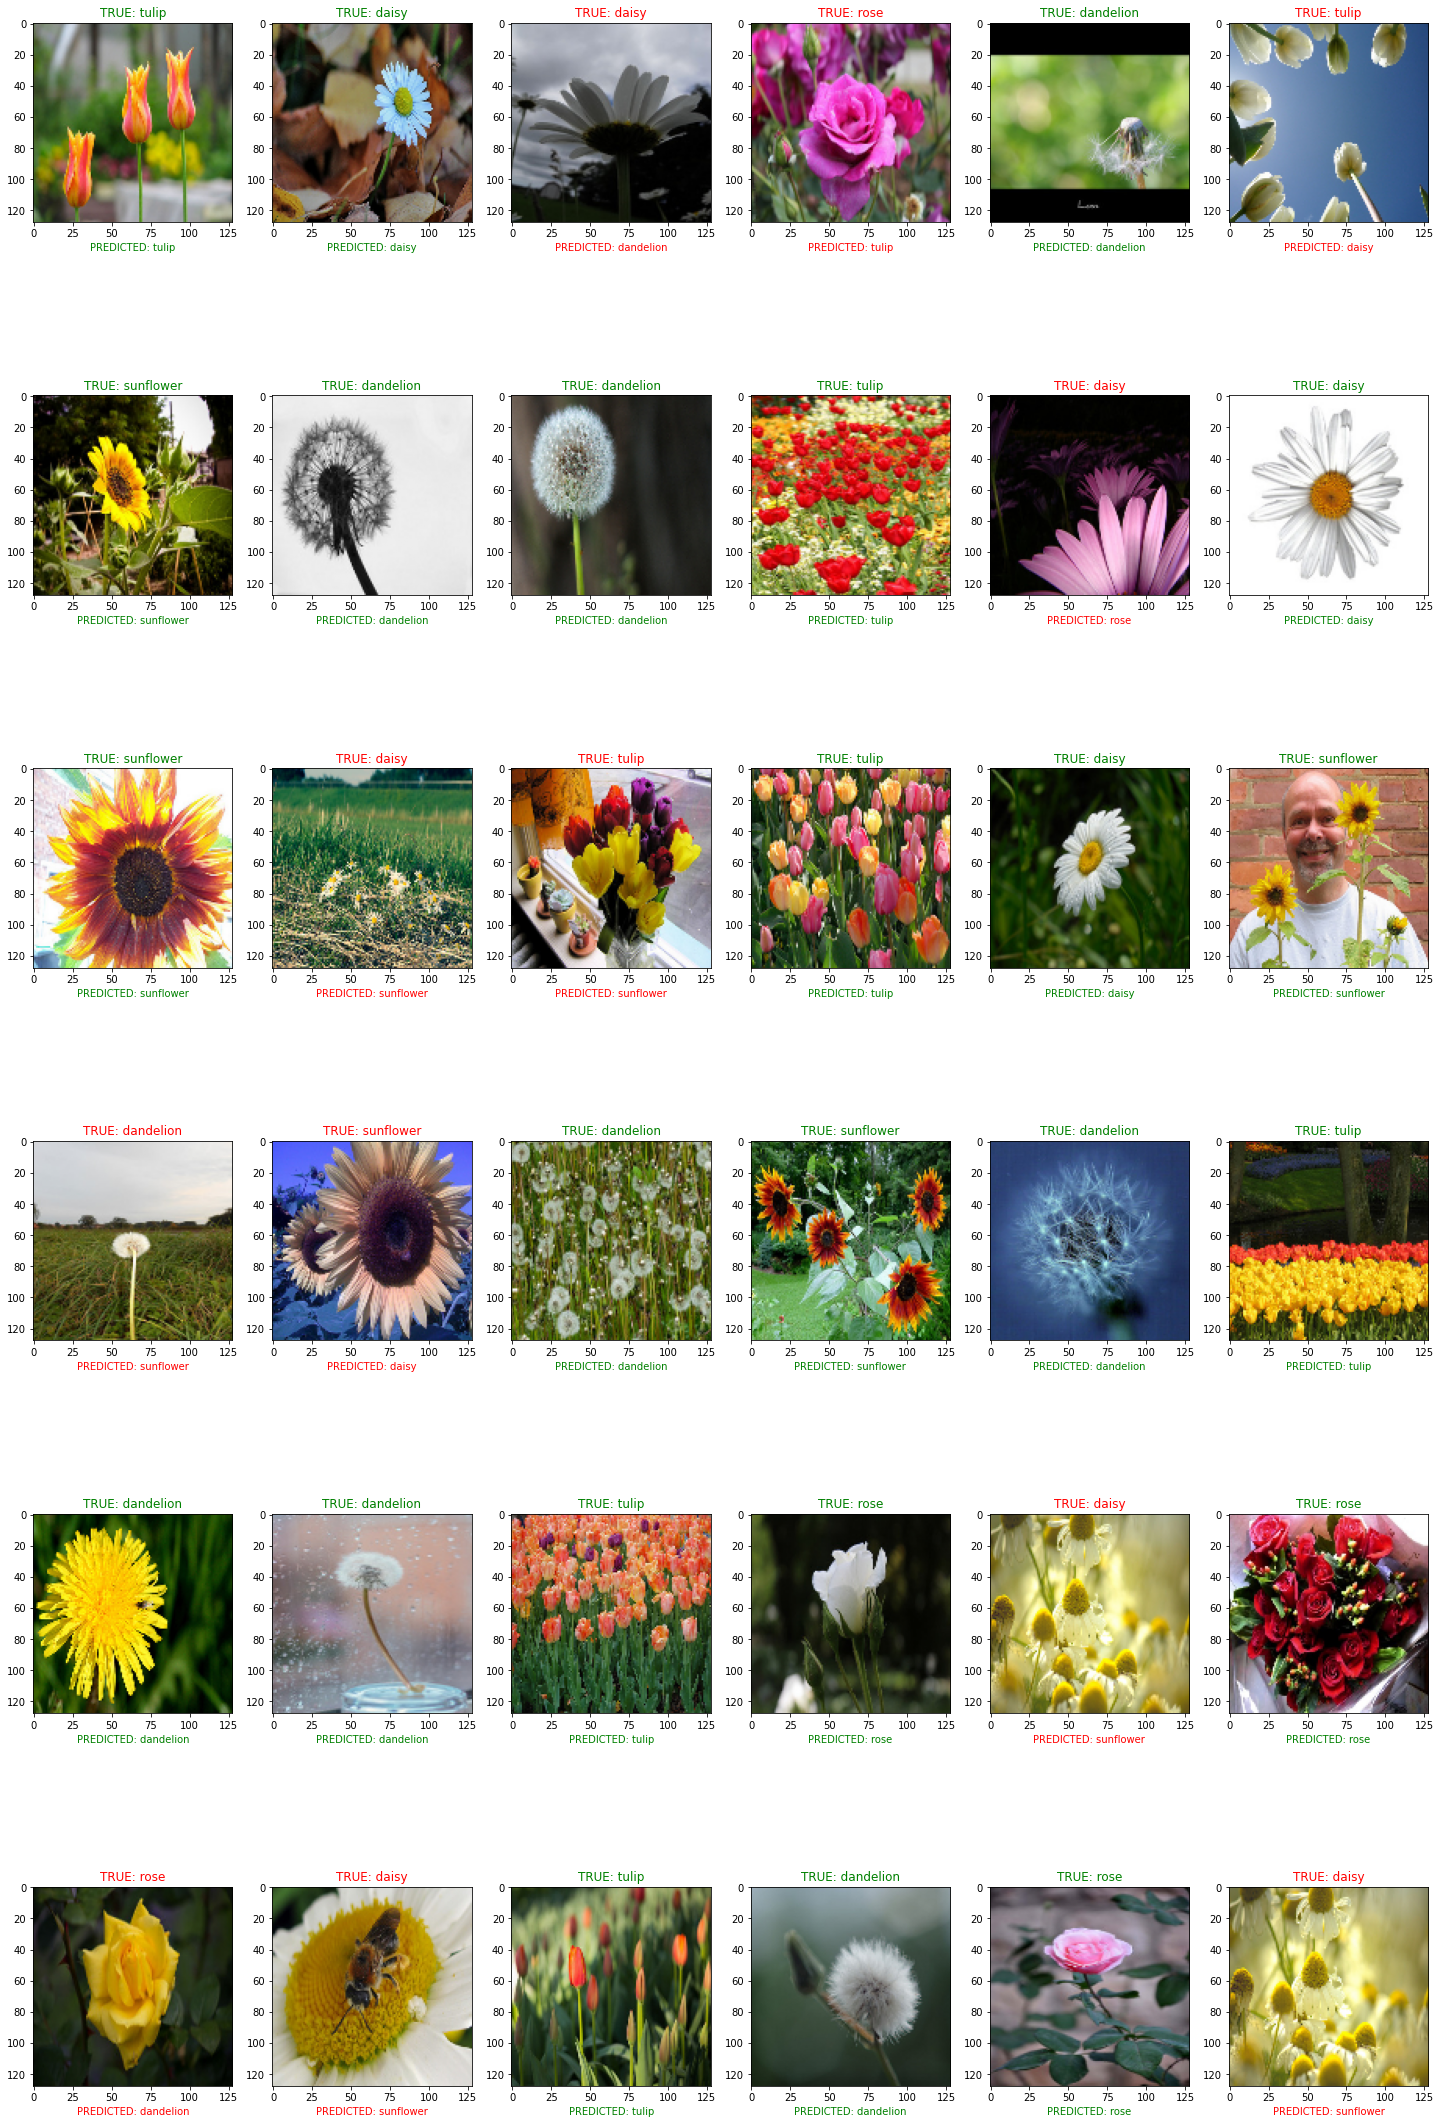

In [16]:
categories=np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25,40))

for i in range(6):
    for j in range(6):
        k=int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: "+ categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')           

In [22]:
model.save('flower_recognition_model.h5')